# DATA SCIENCE INTERNSHIP TASK 2

NAME - NAGA VENKATA LAKSHMI CHEEPULLA 
Use Clustering Techniques for the any customer dataset using machine learning.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading data set
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
x=df.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


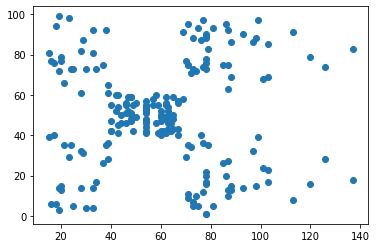

In [16]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

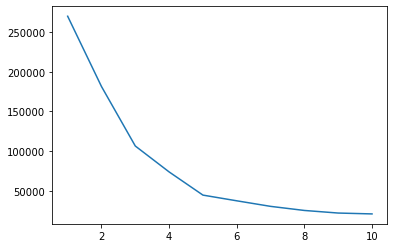

In [17]:
#finding no of clusters  by elbow method
wcss_list=[] # Initiating the list for thr values of wcss

# Using for loop for iterations from 1 to 10

for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.show()

# Taining the k means model on a dataset

In [18]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=0)
y_predict=kmeans.fit_predict(x)

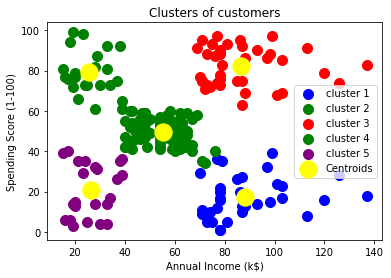

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x[y_predict == 0].iloc[:, 0], x[y_predict == 0].iloc[:, 1], s=100, c='blue', label='cluster 1') # for 1st cluster
plt.scatter(x[y_predict == 1].iloc[:, 0], x[y_predict == 1].iloc[:, 1], s=100, c='green', label='cluster 2') # for 2nd cluster
plt.scatter(x[y_predict == 2].iloc[:, 0], x[y_predict == 2].iloc[:, 1], s=100, c='red', label='cluster 3') # for 3rd cluster
plt.scatter(x[y_predict == 3].iloc[:, 0], x[y_predict == 3].iloc[:, 1], s=100, c='green', label='cluster 4') # for 4th cluster
plt.scatter(x[y_predict == 4].iloc[:, 0], x[y_predict == 4].iloc[:, 1], s=100, c='purple', label='cluster 5') # for 5rd cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids') # for centroids

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()